In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import pycountry
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
import altair as alt


In [40]:
custom_palette = ['#002a80', '#2c4fab', '#5974d6', '#889eec', '#bac9fe', 
                  '#ffe7c0', '#ffcf9f', '#ffb67e', '#ff9b5c', '#ff7d36']
custom_style = {
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,  # Remove left if you want minimal style
    'axes.spines.bottom': False,
    'axes.grid': True,
    'grid.color': '#e1e1e1',  # Light grey grid
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.frameon': False  # No border around legends
}

# Apply custom style and palette
sns.set_palette(custom_palette)
sns.set_theme(style="whitegrid", rc=custom_style) 



#### Map

In [41]:
savings_20_22 = pd.read_csv('savings_breakdown_2020-22.csv')
savings_23_25 = pd.read_csv('savings_breakdown_2020-22.csv')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_16447/2764503441.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


#### Outputs generated from WHO TB Github repo

In [42]:
savings_20_22_map = world.merge(savings_20_22, how="left", left_on="name", right_on="Country")
savings_20_22_map = savings_20_22_map[savings_20_22_map['continent'] != 'Antarctica']
savings_20_22_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Unnamed: 0,Country,Savings,Perc. TGF Fund,Perc. Total Fund,Perc. Gap,Perc. Diagnosis Gap
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#savings_23_25_map['Perc. Diagnosis Gap'].value_counts() 

/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_16447/417192873.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  mpatches.Patch(
/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_16447/417192873.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  no_gap_patch = mpatches.Patch(
/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_16447/417192873.py:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  no_data_patch = mpatches.Patch(


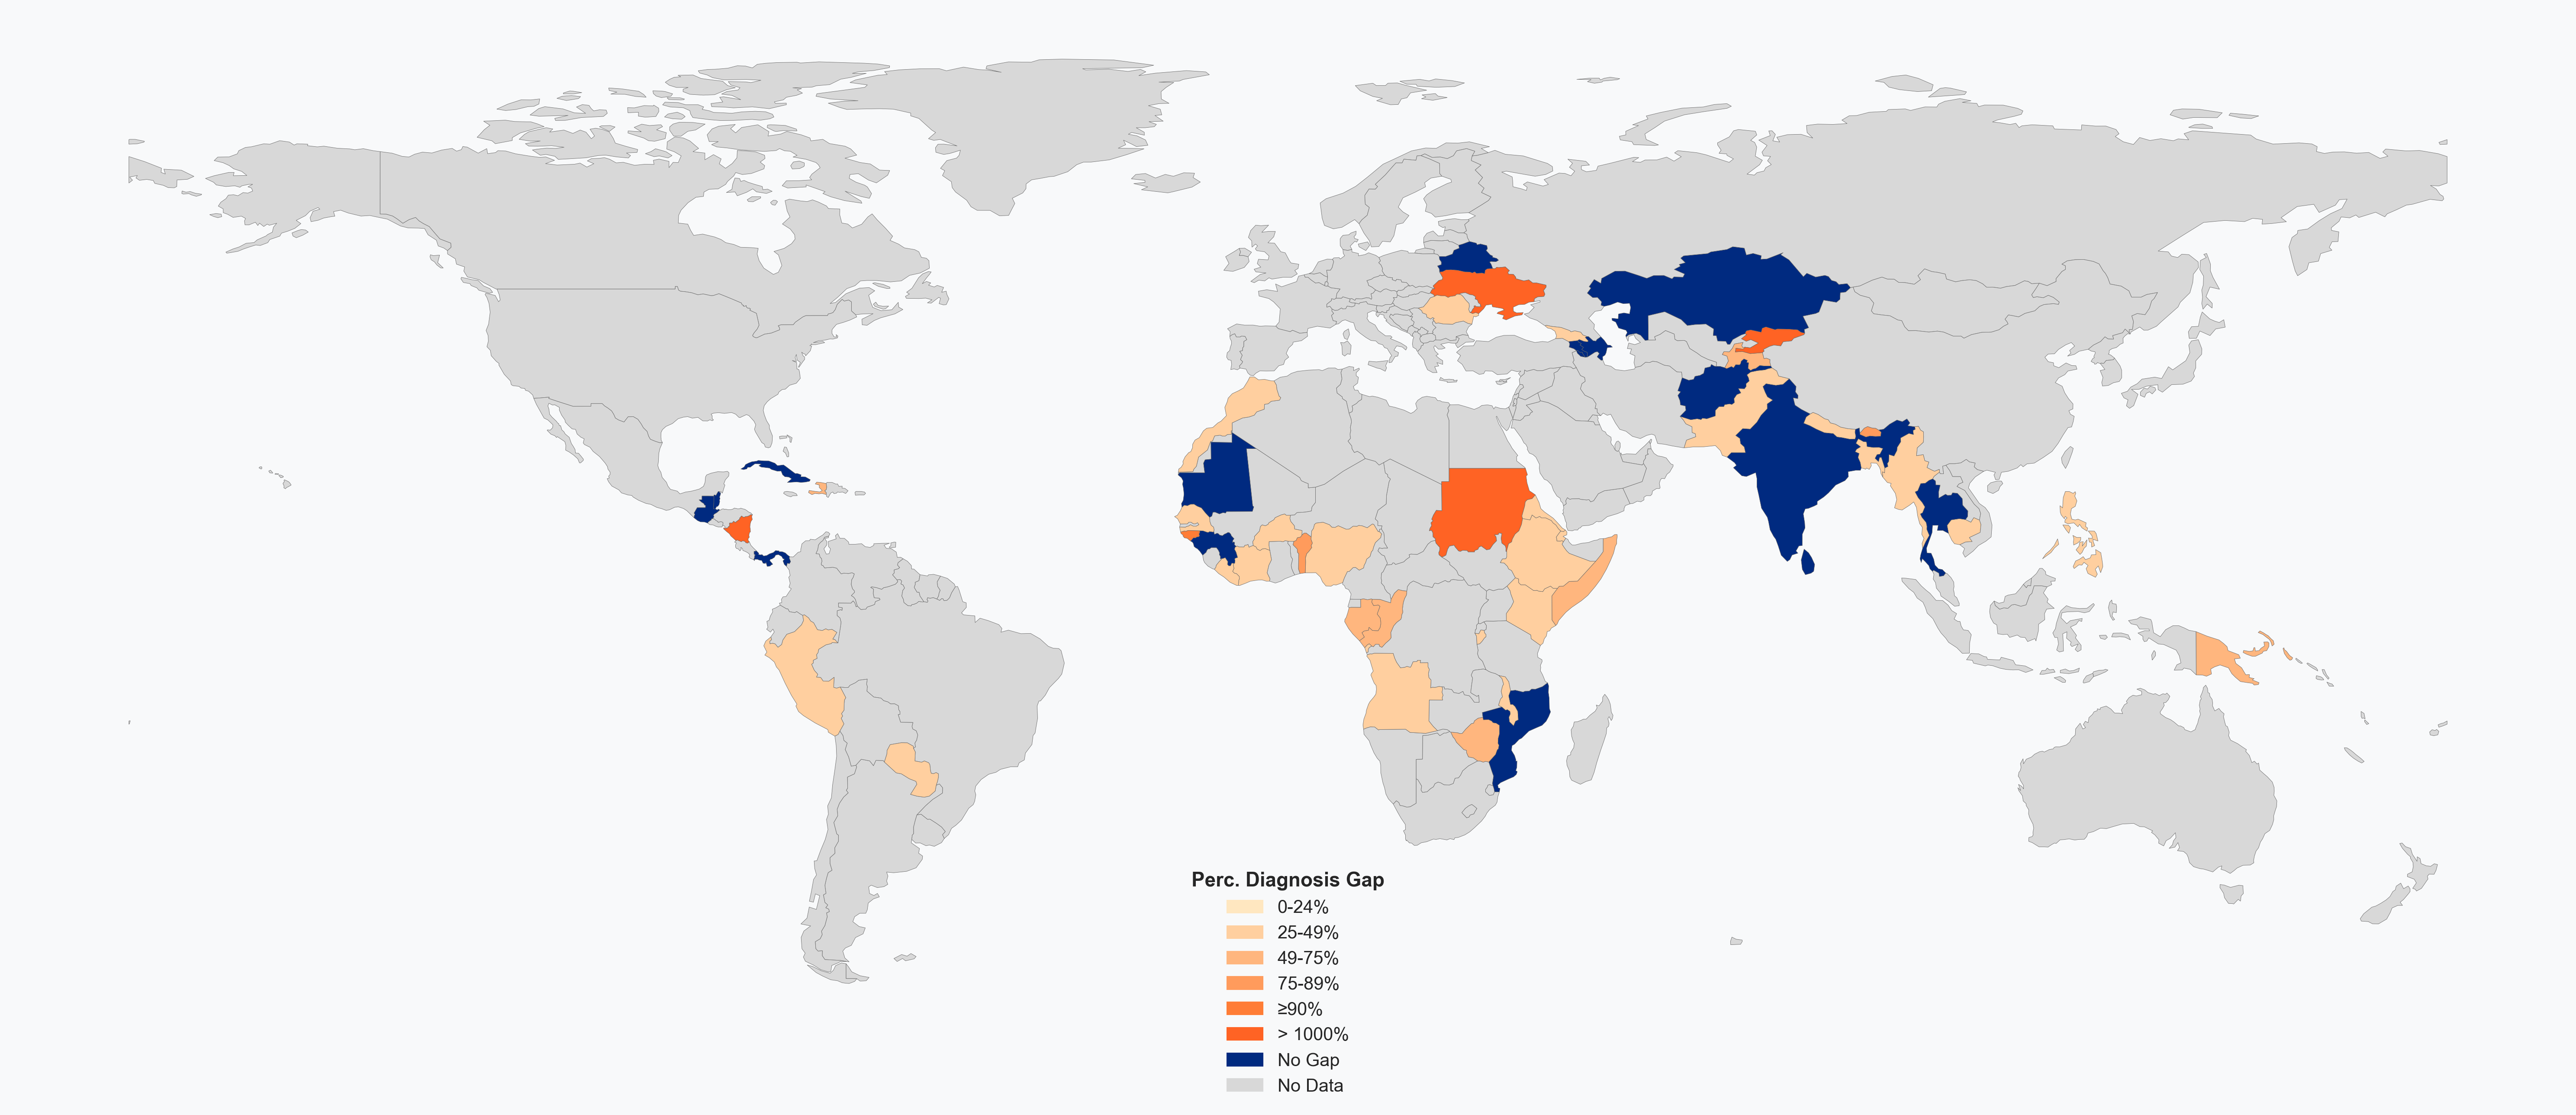

In [ ]:
# Define color palette and scale
palette_map = ['#ffe7c0', '#ffcf9f', '#ffb67e', '#ff9b5c', '#ff7d36', '#ff6324']

color_scale = [0, 25, 49, 75, 89, 1000]

# Function to get the color based on 'wrd_pct'
def get_color(wrd_pct):
    if pd.isna(wrd_pct):
        return '#d8d8d8'  # Grey for No Data
    if isinstance(wrd_pct, str) and wrd_pct.lower() == "no gap":
        return '#002a80'  # Green for "No Gap" category
    wrd_pct = min(max(float(wrd_pct), 0), 4000)  # Ensure numeric handling for other values
    for i, val in enumerate(color_scale):
        if wrd_pct <= val:
            return palette_map[i]
    return palette_map[-1]

# Apply the colors to the 'color' column
savings_20_22_map['color'] = savings_20_22_map['Perc. Diagnosis Gap'].apply(get_color)

# Create figure with specific dimensions and DPI
fig, ax = plt.subplots(1, 1, figsize=(20, 12), dpi=300)

# Add background color
ax.set_facecolor('#F8F9FA')
fig.patch.set_facecolor('#F8F9FA')

# Plot the base map with custom colors
savings_20_22_map.plot(
    ax=ax,
    color=savings_20_22_map['color'],
    legend=False,
    missing_kwds={'color': '#d8d8d8'},
    linewidth=0.2,  # Thinner borders
    edgecolor='#666666'  # Softer border color
)

# Create custom legend with refined styling
legend_labels = ['0-24%', '25-49%', '49-75%', '75-89%', '≥90%', '> 1000%', 'No Gap']
color_patches = [
    mpatches.Patch(
        color=palette_map[i], 
        label=legend_labels[i],
        edgecolor='#666666',
        linewidth=0.5
    ) 
    for i in range(len(palette_map))
]

# Add "No Gap" label (for #00b050)
no_gap_patch = mpatches.Patch(
    color='#002a80', 
    label='No Gap',
    edgecolor='#666666',
    linewidth=0.5
)

# Add "No Data" label (for #d8d8d8)
no_data_patch = mpatches.Patch(
    color='#d8d8d8', 
    label='No Data',
    edgecolor='#666666',
    linewidth=0.5
)

# Combine all legend elements
all_patches = color_patches + [no_gap_patch, no_data_patch]

# Add legend with refined styling
legend = ax.legend(
    handles=all_patches, 
    title="Perc. diagnosis gap", 
    loc='lower center',
    bbox_to_anchor=(0.5, -0.08), 
    fontsize=10
)

# Style the legend title
legend.get_title().set_fontsize('11')
legend.get_title().set_fontweight('bold')

# Remove axes
ax.set_axis_off()

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()
